In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

C:\Users\allie\anaconda33\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
netflix_origs = pd.read_csv("NetflixOriginals.csv", encoding = "cp437")
netflix_origs

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
netflix_origs = netflix_origs[["Title", "IMDB Score", "Language"]]

In [4]:
netflix_origs["Language"].unique()
language = netflix_origs.groupby("Language")
language.mean()
languagemean = pd.DataFrame(language.mean()).sort_values(["IMDB Score"], ascending = False)
languagemean
languagemean = languagemean.reset_index()
languagemean = languagemean.loc[languagemean["Language"].str.contains("/")==False]
# languagemean[languagemean["Language"].str.contains("/")==False]
languagemean
language_head = languagemean.head()
language_head

,Language,IMDB Score
8,Tamil,7.20000
9,Bengali,7.10000
11,Georgian,6.80000
16,Japanese,6.40000
17,English,6.38005


[Text(0, 0, 'Tamil'),
 Text(1, 0, 'Bengali'),
 Text(2, 0, 'Georgian'),
 Text(3, 0, 'Japanese'),
 Text(4, 0, 'English')]

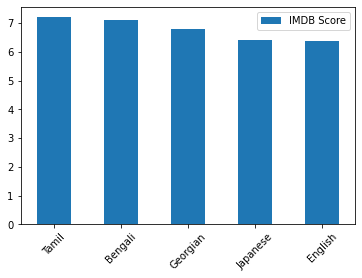

In [5]:
#langbar = language_head.plot.bar()
lang = language_head["Language"]
ax1 = language_head.plot.bar(rot=45)
ax1.set_xticklabels(lang)

In [6]:
lst = []
for i in range(len(netflix_origs)):
    language = str(netflix_origs.loc[i]["Language"])
    if ("/" in language):
        split = language.split("/")
        for j in range(len(split)):
            row = netflix_origs.loc[i].copy()
            row["Language"] = split[j]
            lst.append(row)
    else:
        row = netflix_origs.loc[i].copy()
        lst.append(row)
netflix_origs_split = pd.DataFrame(lst)
netflix_origs_split

,Title,IMDB Score,Language
0,Enter the Anime,2.5,English
0,Enter the Anime,2.5,Japanese
1,Dark Forces,2.6,Spanish
2,The App,2.6,Italian
3,The Open House,3.2,English
...,...,...,...
580,Winter on Fire: Ukraine's Fight for Freedom,8.4,Ukranian
580,Winter on Fire: Ukraine's Fight for Freedom,8.4,Russian
581,Springsteen on Broadway,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,8.6,Portuguese


In [7]:
language = netflix_origs_split.groupby("Language")
language.mean()
languagemean = pd.DataFrame(language.mean()).sort_values(["IMDB Score"], ascending = False)
languagemean


languagesorted = netflix_origs_split.sort_values(["IMDB Score"], ascending = False)
langsortedhead = languagesorted.head()
language.count()

,Title,IMDB Score
Language,,
Akan,1,1
Arabic,1,1
Basque,1,1
Bengali,1,1
Catalan,1,1
Dutch,3,3
English,422,422
Filipino,2,2
French,21,21


Text(0.5, 1.0, 'Languages of Netflix Original Movies With Highest IMDB Ratings')

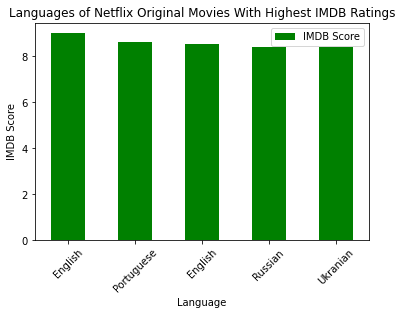

In [8]:
lang = langsortedhead["Language"]
ax1 = langsortedhead.plot.bar(rot=45, color='g')
ax1.set_xticklabels(lang)
plt.xlabel("Language")
plt.ylabel("IMDB Score")
plt.title("Languages of Netflix Original Movies With Highest IMDB Ratings")

Text(0.5, 1.0, 'Languages of Netflix Original Movies With Highest IMDB Ratings')

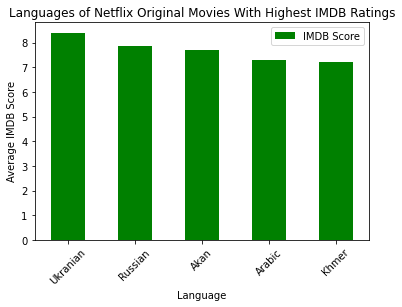

In [9]:
languagemean = languagemean.head()
# lang2 = languagemean["Language"]
ax2 = languagemean.plot.bar(rot=45, color='g')
# ax2.set_xticklabels(lang2)
plt.xlabel("Language")
plt.ylabel("Average IMDB Score")
plt.title("Languages of Netflix Original Movies With Highest IMDB Ratings")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

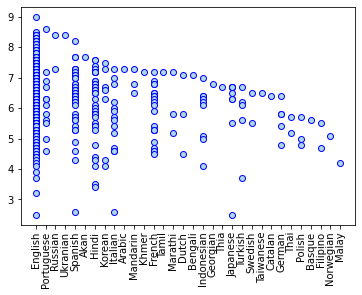

In [10]:
plt.scatter(languagesorted["Language"], languagesorted["IMDB Score"], color='lightblue', edgecolor='blue')
plt.xticks(rotation = 90)

In [12]:
popular_language = netflix_origs_split[["Language", "IMDB Score"]]
languages = popular_language.sort_values(by = "Language" )["Language"].unique()
popular_language["Language_num"]=""
popular_language


,Language,IMDB Score,Language_num
0,English,2.5,
0,Japanese,2.5,
1,Spanish,2.6,
2,Italian,2.6,
3,English,3.2,
...,...,...,...
580,Ukranian,8.4,
580,Russian,8.4,
581,English,8.5,
582,Portuguese,8.6,


In [13]:
#assign numeric values to top 5 most popular languages
popular_language.loc[popular_language['Language'] == "English", 'Language_num'] = 1
popular_language.loc[popular_language['Language'] == "Spanish", 'Language_num'] = 2
popular_language.loc[popular_language['Language'] == "Hindi", 'Language_num'] = 3
popular_language.loc[popular_language['Language'] == "Italian", 'Language_num'] = 4
popular_language.loc[popular_language['Language'] == "Portuguese", 'Language_num'] = 5


popular_language.replace('', 0, inplace = True)
popular_language = popular_language.loc[popular_language["Language_num"] != 0]
popular_language
# type(scorelanguage["Language_num"])
# scorelanguage["Language_num"]


,Language,IMDB Score,Language_num
0,English,2.5,1
1,Spanish,2.6,2
2,Italian,2.6,4
3,English,3.2,1
4,Hindi,3.4,3
...,...,...,...
579,English,8.4,1
580,English,8.4,1
581,English,8.5,1
582,Portuguese,8.6,5


In [15]:
stats.f_oneway(popular_language['Language_num'], popular_language['IMDB Score'])

F_onewayResult(statistic=7319.980613606987, pvalue=0.0)